In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [1]:
!pip install Sastrawi

In [2]:
!pip uninstall gensim numpy -y
!pip install gensim numpy

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

Dataset loaded. Showing the first 5 rows:
  sentiment                                  processed_content
0   negatif                                    akun gopay blok
1    netral                          lambat bos aplikasi gojek
2   positif  kenapa kemarin buka aplikasi gojek kasih binta...
3   negatif  download gojek hape top u gopay transaksi dial...
4   positif                                             mantap

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223855 entries, 0 to 223854
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   sentiment          223855 non-null  object
 1   processed_content  223853 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB

Shape of dataframe after dropping NaNs: (223853, 2)

FastText model trained with embedding dimension: 100

Labels encoded. Number of classes: 3
Label mapping: {'negatif': 0, 'netral': 1, 'positif': 2}
Found 63816 unique to

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     6,381,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,381,700 (24.34 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,381,700 (24.34 MB)

None
Training Fold 1...
Epoch 1/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 69s 12ms/step - accuracy: 0.8717 - loss: 0.3673 - val_accuracy: 0.8842 - val_loss: 0.3332
Epoch 2/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.8851 - loss: 0.3331 - val_accuracy: 0.8798 - val_loss: 0.3367
Epoch 3/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.8861 - loss: 0.3273 - val_accuracy: 0.8867 - val_loss: 0.3299
Epoch 4/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 78s 11ms/step - accuracy: 0.8883 - loss: 0.3229 - val_accuracy: 0.8875 - val_loss: 0.3251
Epoch 5/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.8894 - loss: 0.3202 - val_accuracy: 0.8884 - val_loss: 0.3232
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Fold 1 - Accuracy: 0.8884, Precision: 0.8586, Recall: 0.8884, F1-Score: 0.8717
Training history plot for fold 1 saved as fold_1_training_history.png

--- Fold 2/5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     6,381,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,381,700 (24.34 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,381,700 (24.34 MB)

None
Training Fold 2...
Epoch 1/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 65s 11ms/step - accuracy: 0.8696 - loss: 0.3709 - val_accuracy: 0.8828 - val_loss: 0.3346
Epoch 2/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.8835 - loss: 0.3353 - val_accuracy: 0.8846 - val_loss: 0.3289
Epoch 3/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 81s 12ms/step - accuracy: 0.8861 - loss: 0.3287 - val_accuracy: 0.8859 - val_loss: 0.3272
Epoch 4/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 62s 11ms/step - accuracy: 0.8889 - loss: 0.3223 - val_accuracy: 0.8873 - val_loss: 0.3243
Epoch 5/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.8910 - loss: 0.3172 - val_accuracy: 0.8870 - val_loss: 0.3264
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Fold 2 - Accuracy: 0.8870, Precision: 0.8712, Recall: 0.8870, F1-Score: 0.8704
Training history plot for fold 2 saved as fold_2_training_history.png

--- Fold 3/5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     6,381,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,381,700 (24.34 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,381,700 (24.34 MB)

None
Training Fold 3...
Epoch 1/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 68s 12ms/step - accuracy: 0.8727 - loss: 0.3650 - val_accuracy: 0.8847 - val_loss: 0.3360
Epoch 2/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 64s 11ms/step - accuracy: 0.8853 - loss: 0.3307 - val_accuracy: 0.8821 - val_loss: 0.3399
Epoch 3/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.8862 - loss: 0.3269 - val_accuracy: 0.8876 - val_loss: 0.3294
Epoch 4/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 62s 11ms/step - accuracy: 0.8876 - loss: 0.3241 - val_accuracy: 0.8876 - val_loss: 0.3270
Epoch 5/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.8897 - loss: 0.3182 - val_accuracy: 0.8886 - val_loss: 0.3268
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Fold 3 - Accuracy: 0.8886, Precision: 0.8970, Recall: 0.8886, F1-Score: 0.8710
Training history plot for fold 3 saved as fold_3_training_history.png

--- Fold 4/5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │     6,381,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,381,700 (24.34 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,381,700 (24.34 MB)

None
Training Fold 4...
Epoch 1/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 68s 12ms/step - accuracy: 0.8731 - loss: 0.3671 - val_accuracy: 0.8847 - val_loss: 0.3327
Epoch 2/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 63s 11ms/step - accuracy: 0.8849 - loss: 0.3320 - val_accuracy: 0.8866 - val_loss: 0.3287
Epoch 3/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 84s 12ms/step - accuracy: 0.8875 - loss: 0.3258 - val_accuracy: 0.8883 - val_loss: 0.3240
Epoch 4/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 66s 12ms/step - accuracy: 0.8892 - loss: 0.3199 - val_accuracy: 0.8883 - val_loss: 0.3253
Epoch 5/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 67s 12ms/step - accuracy: 0.8926 - loss: 0.3128 - val_accuracy: 0.8885 - val_loss: 0.3219
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
Fold 4 - Accuracy: 0.8885, Precision: 0.8570, Recall: 0.8885, F1-Score: 0.8714
Training history plot for fold 4 saved as fold_4_training_history.png

--- Fold 5/5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │     6,381,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,381,700 (24.34 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,381,700 (24.34 MB)

None
Training Fold 5...
Epoch 1/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 69s 12ms/step - accuracy: 0.8726 - loss: 0.3671 - val_accuracy: 0.8826 - val_loss: 0.3339
Epoch 2/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 81s 12ms/step - accuracy: 0.8846 - loss: 0.3330 - val_accuracy: 0.8862 - val_loss: 0.3274
Epoch 3/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.8876 - loss: 0.3244 - val_accuracy: 0.8874 - val_loss: 0.3261
Epoch 4/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.8896 - loss: 0.3210 - val_accuracy: 0.8882 - val_loss: 0.3236
Epoch 5/5
5597/5597 ━━━━━━━━━━━━━━━━━━━━ 64s 11ms/step - accuracy: 0.8916 - loss: 0.3155 - val_accuracy: 0.8889 - val_loss: 0.3223
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
Fold 5 - Accuracy: 0.8889, Precision: 0.8728, Recall: 0.8889, F1-Score: 0.8722
Training history plot for fold 5 saved as fold_5_training_history.png

--- Overall Cross-Validation Results ---
Average Accuracy: 0.8883 (+/- 0.0007)
Average Precision: 0.8713 (+/- 0.0143)
Average Re

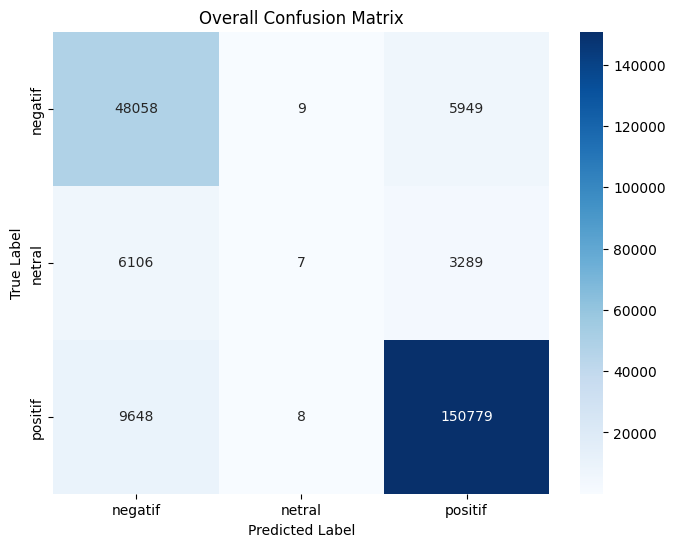

Overall confusion matrix plot saved as overall_confusion_matrix.png and displayed.
Tokenizer saved to tokenizer.pickle
Label encoder saved to label_encoder.pickle


FastText model saved to fasttext_model.bin
LSTM model from the last fold saved as lstm_sentiment_model.h5

Model training and evaluation complete.
Artifacts (plots, models, tokenizer, label encoder) have been saved.
Label mapping used: {'negatif': 0, 'netral': 1, 'positif': 2}
Max sequence length: 95
Vocabulary size: 63816
Embedding dimension: 100


In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional # Added Bidirectional here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import FastText # Import FastText
import tensorflow as tf # Import tensorflow
from tensorflow import keras # Import keras

# Load the dataset
try:
    df = pd.read_csv("cleaned_data.csv")
except FileNotFoundError:
    print("Error: 'processed_gojek_reviews.csv' not found. Please ensure the file is in the correct directory.")
    # Create a dummy dataframe for demonstration if file not found, so the rest of the code can be checked.
    # In a real scenario, we would stop here or ask the user to upload the file.
    data = {'sentiment': ['negatif', 'netral', 'positif', 'negatif', 'positif', 'netral', 'negatif', 'netral', 'positif', 'negatif', 'positif', 'netral', 'negatif', 'netral', 'positif'],
            'processed_content': ['akun gopay blok', 'lambat bos aplikasi gojek', 'kenapa kemarin buka aplikasi gojek kasih bintang normal kasih bintang', 'drivernya ramah banget', 'aplikasi sering error', 'promo menarik selalu ada', 'susah cari driver saat jam sibuk', 'tampilan ui bagus dan mudah digunakan', 'gopaylater sangat membantu', 'sering cancel orderan tiba tiba', 'customer service responsif', 'update terbaru bikin berat', 'poin loyalitas kurang menarik', 'go ride cepat sampai tujuan', 'fitur lengkap dan bermanfaat']}
    df = pd.DataFrame(data)
    print("Using a dummy dataset for demonstration purposes as the original file was not found.")


print("Dataset loaded. Showing the first 5 rows:")
print(df.head())
print("\nDataset info:")
df.info()

# Drop rows with missing values in 'processed_content' or 'sentiment'
df.dropna(subset=['processed_content', 'sentiment'], inplace=True)
print(f"\nShape of dataframe after dropping NaNs: {df.shape}")

# Convert 'processed_content' to string type to avoid issues with FastText if any numerical data slipped in
df['processed_content'] = df['processed_content'].astype(str)

# 1. Feature Engineering (Word Embeddings - FastText)
# Prepare text data for FastText (list of lists of tokens)
tokenized_texts = [text.split() for text in df['processed_content']]

# Train FastText model
embedding_dim = 100  # You can tune this
fasttext_model = FastText(sentences=tokenized_texts, vector_size=embedding_dim, window=5, min_count=1, workers=4, sg=1) # sg=1 for skip-gram

print(f"\nFastText model trained with embedding dimension: {embedding_dim}")

# Prepare data for LSTM
texts = df['processed_content'].values
labels = df['sentiment'].values

# Encode labels
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
print(f"\nLabels encoded. Number of classes: {num_classes}")
print(f"Label mapping: {dict(zip(label_encoder.classes_, range(num_classes)))}")


# Tokenize text for Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens.")

# Pad sequences
max_sequence_length = max(len(s) for s in sequences) # Determine max length based on the actual tokenized sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
print(f"Sequences padded to length: {max_sequence_length}")

# Create embedding matrix for Keras Embedding layer
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in fasttext_model.wv:
        embedding_matrix[i] = fasttext_model.wv[word]
    # Words not found in FastText model will be all-zeros.

print(f"Embedding matrix created with shape: {embedding_matrix.shape}")

# 2. Model Klasifikasi (LSTM) & 3. Evaluasi Model (Cross-validation)
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Store results
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1s = []
all_true_labels = []
all_pred_labels = []

fold_no = 1
for train_index, val_index in skf.split(padded_sequences, integer_encoded_labels):
    print(f"\n--- Fold {fold_no}/{n_folds} ---")
    X_train, X_val = padded_sequences[train_index], padded_sequences[val_index]
    y_train, y_val = integer_encoded_labels[train_index], integer_encoded_labels[val_index]

    # Model Bidirectional LSTM
    model = keras.Sequential([
        keras.layers.Embedding(len(word_index) + 1, embedding_dim, input_length=max_sequence_length, weights=[embedding_matrix], trainable=False), # Corrected input_dim, input_length, added weights and trainable
        keras.layers.Bidirectional(keras.layers.LSTM(64)),
        keras.layers.Dense(num_classes, activation='softmax') # Changed output units and activation for multi-class classification
    ])

    model.compile(loss='sparse_categorical_crossentropy', # Changed loss for multi-class integer labels
                  optimizer='adam',
                  metrics=['accuracy'])

    print(model.summary())

    # Training
    print(f"Training Fold {fold_no}...")
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Evaluate
    y_pred_probs = model.predict(X_val)
    y_pred = np.argmax(y_pred_probs, axis=1)

    all_true_labels.extend(y_val)
    all_pred_labels.extend(y_pred)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1s.append(f1)

    print(f"Fold {fold_no} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    # Plot training history for this fold
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold_no} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"fold_{fold_no}_training_history.png")
    plt.close() # Close the plot to avoid displaying it now if not needed or to save memory
    print(f"Training history plot for fold {fold_no} saved as fold_{fold_no}_training_history.png")


    fold_no += 1

print("\n--- Overall Cross-Validation Results ---")
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f} (+/- {np.std(fold_accuracies):.4f})")
print(f"Average Precision: {np.mean(fold_precisions):.4f} (+/- {np.std(fold_precisions):.4f})")
print(f"Average Recall: {np.mean(fold_recalls):.4f} (+/- {np.std(fold_recalls):.4f})")
print(f"Average F1-Score: {np.mean(fold_f1s):.4f} (+/- {np.std(fold_f1s):.4f})")

# Confusion Matrix for overall results
cm = confusion_matrix(all_true_labels, all_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("overall_confusion_matrix.png")
plt.show()
print("Overall confusion matrix plot saved as overall_confusion_matrix.png and displayed.")

# Save the tokenizer and label encoder for later use if needed for inference
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Tokenizer saved to tokenizer.pickle")

with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Label encoder saved to label_encoder.pickle")

# Save the trained FastText model
fasttext_model.save("fasttext_model.bin")
print("FastText model saved to fasttext_model.bin")

# Save the final LSTM model (optional, or save the best model from CV)
# For simplicity, we'll just save the model from the last fold.
# In a real scenario, you'd monitor validation loss and save the best model.
model.save("lstm_sentiment_model.h5")
print("LSTM model from the last fold saved as lstm_sentiment_model.h5")

# Save the processed dataframe with padded sequences and encoded labels (optional)
# This could be large, so consider if it's truly necessary.
# df_processed_for_lstm = pd.DataFrame(padded_sequences)
# df_processed_for_lstm['encoded_sentiment'] = integer_encoded_labels
# df_processed_for_lstm.to_csv("processed_data_for_lstm.csv", index=False)
# print("DataFrame with padded sequences and encoded labels saved to processed_data_for_lstm.csv")

print("\nModel training and evaluation complete.")
print("Artifacts (plots, models, tokenizer, label encoder) have been saved.")
print(f"Label mapping used: {dict(zip(label_encoder.classes_, range(num_classes)))}")
print(f"Max sequence length: {max_sequence_length}")
print(f"Vocabulary size: {len(word_index)}")
print(f"Embedding dimension: {embedding_dim}")


Plotting training history for the last trained fold...


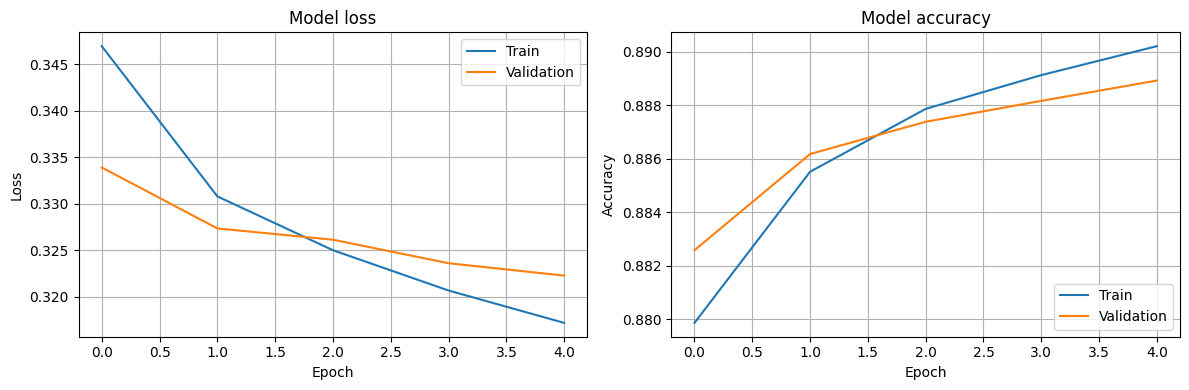

In [8]:
import matplotlib.pyplot as plt


if 'history' in locals(): # Check if history variable exists
    print("\nPlotting training history for the last trained fold...")
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(True)

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("\n'history' object not found. Training history was likely already plotted and saved per fold.")



--- Overall Classification Report ---
              precision    recall  f1-score   support

     negatif       0.75      0.89      0.82     54016
      netral       0.29      0.00      0.00      9402
     positif       0.94      0.94      0.94    160435

    accuracy                           0.89    223853
   macro avg       0.66      0.61      0.59    223853
weighted avg       0.87      0.89      0.87    223853



<Figure size 1000x600 with 0 Axes>

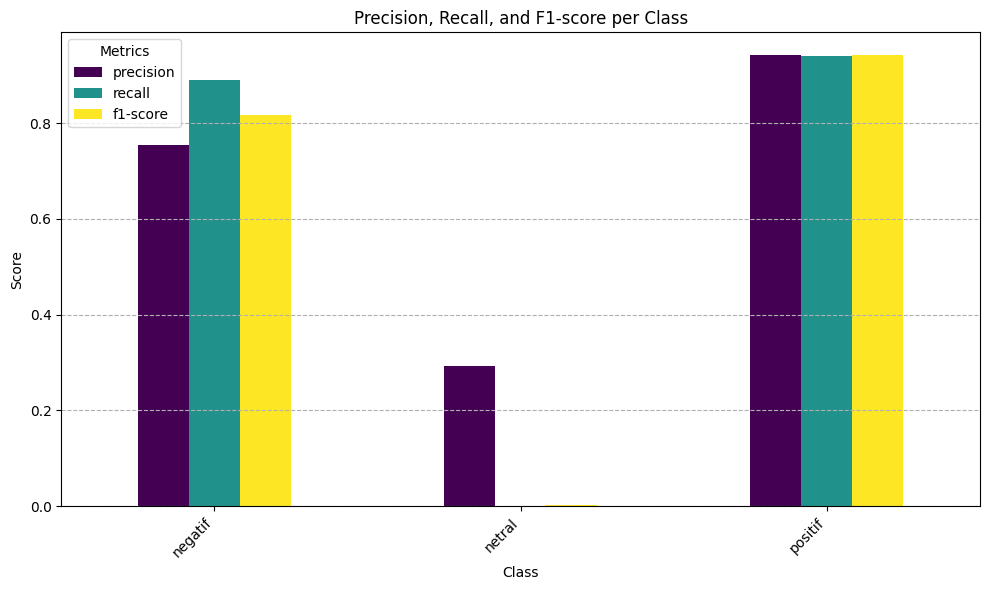

Classification report plot saved as classification_report_plot.png and displayed.


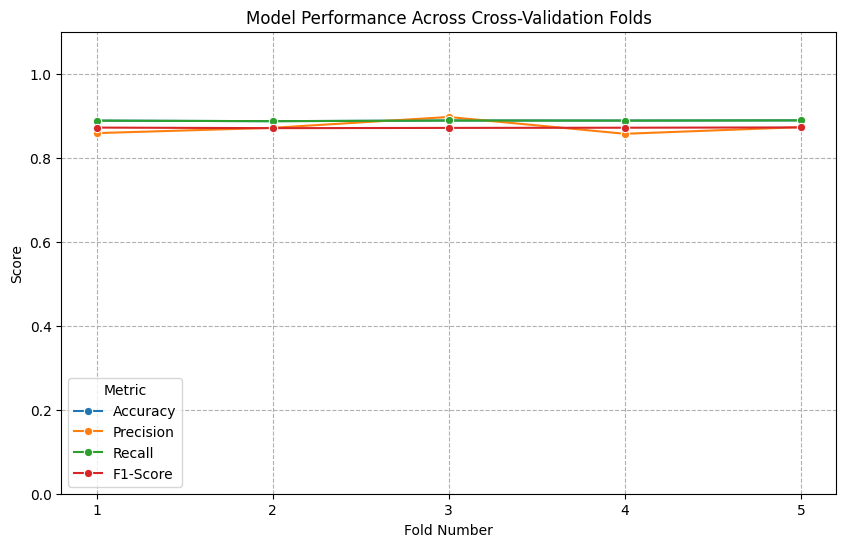

Cross-validation performance plot saved as cv_performance_plot.png and displayed.

Additional visualizations for model evaluation complete.


In [7]:

from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Overall Classification Report ---")
report = classification_report(all_true_labels, all_pred_labels, target_names=label_encoder.classes_, output_dict=True, zero_division=0)
print(classification_report(all_true_labels, all_pred_labels, target_names=label_encoder.classes_, zero_division=0))

report_df = pd.DataFrame(report).transpose()

report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Precision, Recall, and F1-score per Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig("classification_report_plot.png")
plt.show()
print("Classification report plot saved as classification_report_plot.png and displayed.")

metrics_df = pd.DataFrame({
    'Fold': range(1, n_folds + 1),
    'Accuracy': fold_accuracies,
    'Precision': fold_precisions,
    'Recall': fold_recalls,
    'F1-Score': fold_f1s
})

metrics_melted = metrics_df.melt('Fold', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.lineplot(data=metrics_melted, x='Fold', y='Score', hue='Metric', marker='o')
plt.title('Model Performance Across Cross-Validation Folds')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.ylim(0, 1.1) # Set y-axis limits to represent scores appropriately
plt.xticks(range(1, n_folds + 1))
plt.grid(True, linestyle='--')
plt.savefig("cv_performance_plot.png")
plt.show()
print("Cross-validation performance plot saved as cv_performance_plot.png and displayed.")


print("\nAdditional visualizations for model evaluation complete.")
